---
output-file: 03_data_analysis_with_jupyter_and_python.html
title: 03. Data Analysis with Jupyter and Python

---


By [Joses Ho](https://twitter.com/jacuzzijo), [Sangyu
Xu](https://xusangyu.com/), and [Adam
Claridge-Chang](http://www.claridgechang.net/)


## Load Libraries

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
# plot settings
sns.set(style='ticks', font_scale=1.2)

In [ ]:
exploration_times = pd.read_csv("exploration_times.csv")

In [ ]:
exploration_times

,WT,CCR5 KO
0,3.478549,4.983642
1,2.234100,3.502187
2,1.724468,2.469726
3,1.723056,2.210396
4,0.965881,2.508039
5,0.726249,1.465072
6,0.490557,1.202951
7,0.217963,1.474133
8,0.479953,0.976419
9,-0.053350,0.752514


## Loading data

Let's load in an example dataset. We shall load the [iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set).

>The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist [Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) in 1936. It is sometimes called Anderson's Iris data set because [Edgar Anderson](https://en.wikipedia.org/wiki/Edgar_Anderson) collected the data to quantify the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".

<div align="center">
<img src="images/for_ipynb/gaspe.jpg" width="75%">
</div>

>The data set consists of 50 samples from each of three species of Iris (*iris setosa*, *iris virginica* and *iris versicolor*). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

<img src="https://www.wpclipart.com/plants/diagrams/plant_parts/petal_sepal_label.png" alt="Parts of an Iris flower" width="250"/>

In [ ]:
# Read iris data from the sheet with pandas
iris = pd.read_csv("https://www.bitly.com/dukenusda")

## If you're using Windows, you need to use:
# iris = pd.read_csv('C://Users//whho//Downloads//IrisData - iris.csv')

You have created a new object known as a pandas `DataFrame`, with the contents of the CSV. Think of it as a spreadsheet, but with a lot more useful features for data analysis.
It has several methods we can use to handle, analyse, and plot the data.

We can peak at the data using the `.head()` method.

In [ ]:
iris.head() # Gives us the first 5 rows of the dataframe.
# iris.head(10) # Gives us the first 5 rows of the dataframe.




,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Get a summary of the data.

In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Let's see what is in the `species` column.

In [ ]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## Plot the old-fashioned bar chart

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


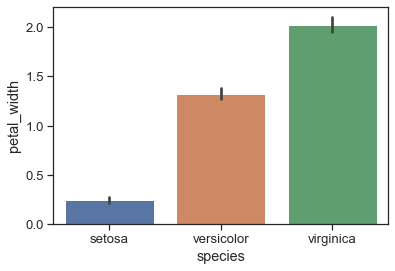

In [ ]:
ax1 = sns.barplot(data = iris, 
                  x = 'species', 
                  y = 'petal_width')

# Axes should always be labelled.
# ax1.set(xlabel='Species', ylabel='Mean Sepal length (cm)')

## Plot a swarmplot, which shows all the data

C:\Users\xusy\.conda\envs\nbdevdabestdev\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


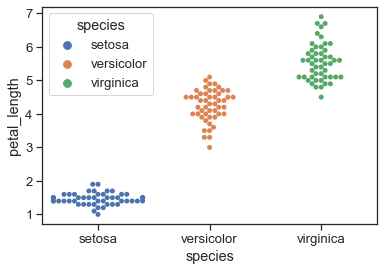

In [ ]:
ax2 = sns.swarmplot(data = iris, 
                    x = 'species', 
                    y = 'petal_length',
                   hue = 'species')

# ax2.set(xlabel='Species', ylabel='Petal length (cm)')

## The split-apply-combine workflow

All your scientific experiments follow a very simple analysis workflow: *split-apply-combine*

You do an experiment on 2 or more groups, apply some summary function to each group, and then aggregate the results.

<div align="center">
<img src="images/for_ipynb/split-apply-combine.jpg" width="75%">
</div>


In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [ ]:
iris.groupby('species').sem()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,0.049850,0.053608,0.024560,0.014904
versicolor,0.072998,0.044378,0.066455,0.027966
virginica,0.089927,0.045608,0.078050,0.038841


The plotting package `seaborn` does this automatically for you.

<span style="color:red">I commented out the below cell because it was giving an error</span>.

In [ ]:
# # `catplot` is short for "categorical plot", 
# # where either the x-axis or y-axis consists of categories.

# ax3 = sns.catplot(data=iris, 
#             kind='bar',   # there are several types of plots.
#             errorbar='sd',      # plot the error bars as ± standard deviations.
#             col='species' # plot each species as its own column.
#            )
# ax3.set_axis_labels("", "Length (cm)")


In [ ]:
# %debug

You should quickly notice that the plot isn't as informative as we want it to be.

The current plot only allows us to investigate the relationships the four metrics within species.

Ideally, we want to directly compare metrics between species. 

To do so, we need to _reshape_ the data.

## The Long-form vs the Wide-form of your data

Our iris dataframe is in the wide-form (below right) and we want to turn it into the long-form. In the original iris dataframe, the data is organised by unit (flower, in rows) and the columns contain a mixtrue of variables (sepal length, sepal width etc). In a long-form dataframe, each columne is a variable, and each row is an observation. (Please read Hadley Wickham's https://vita.had.co.nz/papers/tidy-data.pdf to learn more about tidiness of datasets.) 
<div align="center">
<img src="https://seaborn.pydata.org/_images/data_structure_19_0.png" width="75%">
<figcaption>Michael Waskom, Seaborn Tutorial 2022</figcaption>

</div>


In [ ]:
iris_tidy = pd.melt(iris.reset_index(), 
                    id_vars=['index','species'], 
                    var_name='metric', 
                    value_name='cm')
iris_tidy = iris_tidy.rename(columns = {'index': 'ID'})

In [ ]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
iris_tidy

,ID,species,metric,cm
0,0,setosa,sepal_length,5.1
1,1,setosa,sepal_length,4.9
2,2,setosa,sepal_length,4.7
3,3,setosa,sepal_length,4.6
4,4,setosa,sepal_length,5.0
...,...,...,...,...
595,145,virginica,petal_width,2.3
596,146,virginica,petal_width,1.9
597,147,virginica,petal_width,2.0
598,148,virginica,petal_width,2.3


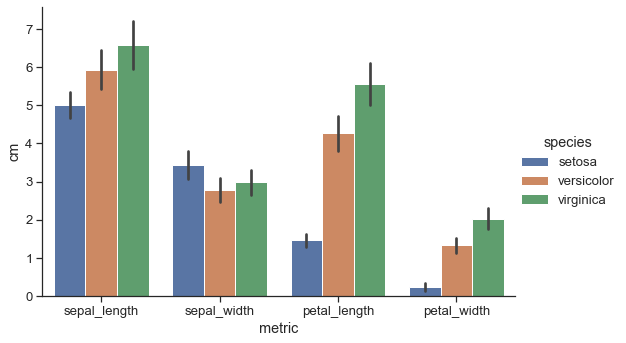

In [ ]:
ax4 = sns.catplot(data=iris_tidy, 
            x='metric', 
            y='cm', 
            hue='species',
            kind='bar', 
            ci='sd',
            aspect=1.5
           )

C:\Users\xusy\.conda\envs\nbdevdabestdev\lib\site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\xusy\.conda\envs\nbdevdabestdev\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


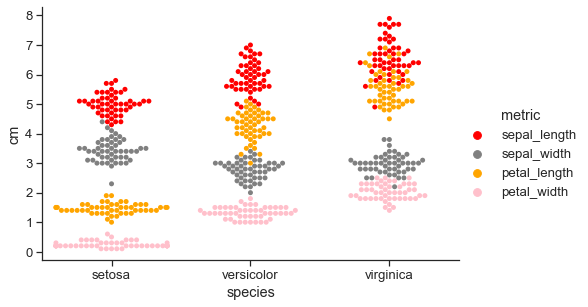

In [ ]:
# f, ax = plt.subplots(1, figsize=(3,3))

ax5 = sns.catplot(data=iris_tidy, 
            kind='swarm', 
             x='species', y='cm', hue='metric',
            size=4.5,
            aspect=1.5,
            #ci='sd',
            palette=['red','grey','orange','pink'],
            
           )

## Scatterplot and linear regression line

Next to the categorical plot, the scatter plot is a very useful visualization tool for biological experiments. Often we want to know how one variable is correlated with another, we can then use a scatterplot to easily take a quick look.

In [ ]:
# Draw a scatteplot of petal width versus length with a simple linear regression line
ax6 = sns.regplot(data=iris, 
                  ci=95,
                  x="sepal_width", 
                  y="petal_length")


# ax6.set(xlabel='Sepal width (cm)', ylabel='Sepal length (cm)')


In [ ]:

for s in iris.species.unique():
    ax7 = sns.regplot(data=iris.loc[iris.species == s], 
                  ci=95,
                  x="sepal_width", 
                  y="petal_length", label = s)
    ax7.legend()


## Seaborn allows you to do that more systematically with pairplot

This is like doing a scatter plot for each pair of the variables in one go. On the diagonal, distributions of values within each species group are plotted for each variable.  



In [ ]:
fig = sns.pairplot(iris, hue="species")

## Dimension Reduction with Principle Component Analysis
We have 4 dimensions we measured the irises on, what if we want a more concise way of describing the data? We can try to find 2 dimensions along which the data has the most variance. 

In [ ]:
from sklearn import decomposition
from sklearn import datasets

import matplotlib.pyplot as plt

iris_pca = datasets.load_iris()
X = iris_pca.data
y = iris_pca.target

pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)


f, ax8 = plt.subplots(1, figsize = (5, 5))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=[iris_pca.target_names[i] for i in y], alpha = 0.7)
ax8.set_xlabel('PC1')
ax8.set_ylabel('PC2')




## Towards Publication-Ready Plots
Try to achieve as much of the final figure requirements as possible via code

In [ ]:
all_metrics = iris_tidy.metric.unique()

all_metrics


In [ ]:
y_titles = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
letters = ['A', 'B', 'C', 'D']

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(2, 2, figsize=(10, 10))

all_axes = ax.flatten()

for i, metric in enumerate(all_metrics):
    
    current_axes = all_axes[i]
    
    sns.swarmplot(data=iris, size = 3.5, 
                  x='species', y=metric, hue = 'species',
                  ax=current_axes)

    current_axes.set(ylabel=y_titles[i])

    
    current_axes.set_ylim(0, 10)
    current_axes.get_ylim 
    current_axes.get_legend().remove()
    current_axes.text(-1, 10.5, letters[i], fontsize = 25, fontweight = 'semibold')



In [ ]:
f.savefig("myplot.svg")
f.savefig("myplot.png", dpi = 300)